<a href="https://colab.research.google.com/github/CO-CO-LAB/Data-Analysis-Portfolio/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### My First Portfolio Ex

Our data includes top 10,000 movies TMDB in csv format

some question to answer

1. Which type of movies are more popular?
2. What are the revenue trends over the years?
3. What are the most popular languages in movies?
4. What are the Top 10 movies with maximum vote average? 4. Display analysis of the revenue trend over the decades.
5. Display analysis of the trend of movie runtime.
--------------------------------------

1. Are specific genres associated with higher revenues?
2. What factors most influence a movie’s revenue?
3. Which genres have the highest average revenue?
4. What are the top 50 movies by revenue and what characteristics do they share?
5. How do taglines correlate with a movie's success?
6. What visualizations can highlight trends in movie popularity?
7. Do longer movies tend to have higher ratings or revenues?
-----------------------------------------




Uploading the CSV File

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Top_10000_Movies.csv to Top_10000_Movies.csv


Read the CSV File into a DataFrame

In [ ]:
import pandas as pd
# Get the filename from the uploaded files
filename = list(uploaded.keys())[0]

# Read the CSV into a DataFrame
df = pd.read_csv(filename, engine='python')

# Display the first few rows
print(df.head())

  Unnamed: 0        id original_language               original_title  \
0          0  580489.0                en  Venom: Let There Be Carnage   
1          1  524434.0                en                     Eternals   
2          2  438631.0                en                         Dune   
3          3  796499.0                en              Army of Thieves   
4          4  550988.0                en                     Free Guy   

   popularity release_date  vote_average  vote_count  \
0    5401.308   2021-09-30           6.8      1736.0   
1    3365.535   2021-11-03           7.1       622.0   
2    2911.423   2021-09-15           8.0      3632.0   
3    2552.437   2021-10-27           6.9       555.0   
4    1850.470   2021-08-11           7.8      3493.0   

                                               genre  \
0         ['Science Fiction', 'Action', 'Adventure']   
1  ['Action', 'Adventure', 'Science Fiction', 'Fa...   
2         ['Action', 'Adventure', 'Science Fiction']   


In [ ]:
# Get a summary of the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9960 entries, 0 to 10013
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         9960 non-null   object 
 1   id                 9960 non-null   float64
 2   original_language  9960 non-null   object 
 3   original_title     9960 non-null   object 
 4   popularity         9960 non-null   float64
 5   release_date       9960 non-null   object 
 6   vote_average       9960 non-null   float64
 7   vote_count         9960 non-null   float64
 8   genre              9960 non-null   object 
 9   overview           9870 non-null   object 
 10  revenue            9960 non-null   float64
 11  runtime            9951 non-null   float64
 12  tagline            7072 non-null   object 
dtypes: float64(6), object(7)
memory usage: 1.1+ MB
None


In [ ]:
# Check for non-numeric values in the 'popularity' column
non_numeric = df[pd.to_numeric(df['popularity'], errors='coerce').isna()]

# Display rows with non-numeric popularity values
print(non_numeric)

print("\nNumber of non-numeric rows in 'popularity' column:", len(non_numeric))

Empty DataFrame
Columns: [Unnamed: 0, id, original_language, original_title, popularity, release_date, vote_average, vote_count, genre, overview, revenue, runtime, tagline]
Index: []

Number of non-numeric rows in 'popularity' column: 0


There are 10014 entries.
Some columns, like id, original_language, original_title, popularity, and release_date, have missing values.
The tagline column has significantly more missing values compared to others.

The data types are a mix of numeric (float64) and categorical (object), with release_date in the wrong format (object).
#####################################################################
#####################################################################
# Cleaning Data + EDA

Handle the Unnamed: 0 Column
This column looks unnecessary, as it seems to be an index. If it’s not providing any useful information, you can drop it.

In [ ]:
# dropping first column
df = df.drop(columns=['Unnamed: 0'])

Handling Missing Values

original_language, original_title, popularity, vote_average, vote_count, genre

These fields are critical for analysis, and might want to drop rows where they are missing, as imputing them wouldn’t make much sense

In [ ]:
#dropping rows where they are missing
df = df.dropna(subset=['id','original_language', 'original_title', 'popularity','release_date', 'genre'])

release_date:

Convert it to a datetime type and handle missing values. You can either drop missing release_date rows or replace them with some default value like the year average.

In [ ]:
# Check for non-numeric values in the 'popularity' column
non_numeric = df[pd.to_numeric(df['popularity'], errors='coerce').isna()]

# Display rows with non-numeric popularity values
print(non_numeric)

print("\nNumber of non-numeric rows in 'popularity' column:", len(non_numeric))

Empty DataFrame
Columns: [id, original_language, original_title, popularity, release_date, vote_average, vote_count, genre, overview, revenue, runtime, tagline]
Index: []

Number of non-numeric rows in 'popularity' column: 0


Regarding **textual field**, if it’s essential to our analysis, we can drop rows with missing overviews. Otherwise, we could leave them as they are if there is no sentiment analysis.




revenue, runtime:

We can either drop rows with missing revenue and runtime or fill them with the average or median values, depending on how plan to use these fields.
Here I filled them with median.
I believe for our exploration considering median revenue is not a good choice. As for some years and genre the population of the data is very low and it can affect our analysis.

In [ ]:
# df['revenue'].fillna(df['revenue'].median(), inplace=True)
df['runtime'].fillna(df['runtime'].median(), inplace=True)

**tagline:**

The tagline field has a lot of missing values, which suggests it’s not essential for every movie. You could either keep it as is or drop the column entirely.

I am going to keep it.

In [ ]:
# Recheck the Data After Cleaning
df.info()  # Check the new structure of the DataFrame
df.head()  # Preview the cleaned data

<class 'pandas.core.frame.DataFrame'>
Index: 9960 entries, 0 to 10013
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 9960 non-null   float64       
 1   original_language  9960 non-null   object        
 2   original_title     9960 non-null   object        
 3   popularity         9960 non-null   float64       
 4   release_date       9960 non-null   datetime64[ns]
 5   vote_average       9960 non-null   float64       
 6   vote_count         9960 non-null   float64       
 7   genre              9960 non-null   object        
 8   overview           9870 non-null   object        
 9   revenue            9960 non-null   float64       
 10  runtime            9960 non-null   float64       
 11  tagline            7072 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 1011.6+ KB


,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,580489.0,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736.0,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000.0,97.0,NaN
1,524434.0,en,Eternals,3365.535,2021-11-03,7.1,622.0,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000.0,157.0,In the beginning...
2,438631.0,en,Dune,2911.423,2021-09-15,8.0,3632.0,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356.0,155.0,"Beyond fear, destiny awaits."
3,796499.0,en,Army of Thieves,2552.437,2021-10-27,6.9,555.0,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0.0,127.0,"Before Vegas, one locksmith became a legend."
4,550988.0,en,Free Guy,1850.470,2021-08-11,7.8,3493.0,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766.0,115.0,Life's too short to be a background character.


Check unique values in each columns

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

id: 9960 distinct values
original_language: 47 distinct values
original_title: 9718 distinct values
popularity: 8566 distinct values
release_date: 5726 distinct values
vote_average: 73 distinct values
vote_count: 3208 distinct values
genre: 2310 distinct values
overview: 9866 distinct values
revenue: 5213 distinct values
runtime: 214 distinct values
tagline: 7035 distinct values


**Once your data is clean:**
I wan t to export the csv file for other processes in MySQL.
Start performing exploratory data analysis (EDA) as outlined before, such as trends over the years, genre distribution, etc.

### Feature Engineering
Create new features: we extract the year from the release_date, group movies by decade, and also create a popularity-to-revenue ratio.

In [ ]:
df['release_year'] = df['release_date'].dt.year
# Handle the popularity to revenue ratio
# If revenue is zero, set the ratio to 0; otherwise, calculate normally
df['popularity_revenue_ratio'] = df.apply(
    lambda row: row['popularity'] / row['revenue'] if row['revenue'] != 0 else 0,
    axis=1
)

In [ ]:
# viewing all attributes by order
print(df.columns)
df.info()

Index(['id', 'original_language', 'original_title', 'popularity',
       'release_date', 'vote_average', 'vote_count', 'genre', 'overview',
       'revenue', 'runtime', 'tagline', 'release_year',
       'popularity_revenue_ratio'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 9960 entries, 0 to 10013
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        9960 non-null   float64       
 1   original_language         9960 non-null   object        
 2   original_title            9960 non-null   object        
 3   popularity                9960 non-null   float64       
 4   release_date              9960 non-null   datetime64[ns]
 5   vote_average              9960 non-null   float64       
 6   vote_count                9960 non-null   float64       
 7   genre                     9960 non-null   object        
 8   overview          

In [ ]:
#  save the file cleaned_movies_data.csv in the current Colab environment
df.to_csv('cleaned_movies_data.csv', index=False)

In [ ]:
# Download the CSV file
files.download('cleaned_movies_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###################################################################
###################################################################
#Exploratory Data Analysis


In [ ]:
# Select numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Display the correlation matrix as a styled table
correlation_matrix.style.background_gradient(cmap='coolwarm').format(precision=2)

,id,popularity,vote_average,vote_count,revenue,runtime
id,1.00,0.14,-0.25,-0.23,-0.20,-0.28
popularity,0.14,1.00,0.05,0.13,0.16,0.03
vote_average,-0.25,0.05,1.00,0.25,0.14,0.37
vote_count,-0.23,0.13,0.25,1.00,0.77,0.30
revenue,-0.20,0.16,0.14,0.77,1.00,0.26
runtime,-0.28,0.03,0.37,0.30,0.26,1.00


however the id column does not have any importance in this correlation table.

**In response to what type of the movies are more popular**

genre
['Comedy', 'Action', 'Adventure', 'Science Fiction']                  1850.470000
['Crime', 'Mystery', 'Drama', 'Comedy']                                957.866000
['Action', 'Comedy', 'Thriller', 'Horror']                             863.019000
['Adventure', 'Fantasy', 'Comedy', 'Action']                           683.909000
['Animation', 'Comedy', 'Music', 'Family']                             611.612000
['Horror', 'Fantasy', 'Mystery']                                       580.002000
['Family', 'Animation', 'Fantasy', 'Music', 'Comedy', 'Adventure']     573.567000
['Animation', 'Science Fiction', 'Fantasy', 'Action']                  563.221000
['Science Fiction', 'Drama', 'Adventure']                              549.884000
['Action', 'Adventure', 'Science Fiction', 'Fantasy']                  532.075286
Name: popularity, dtype: float64


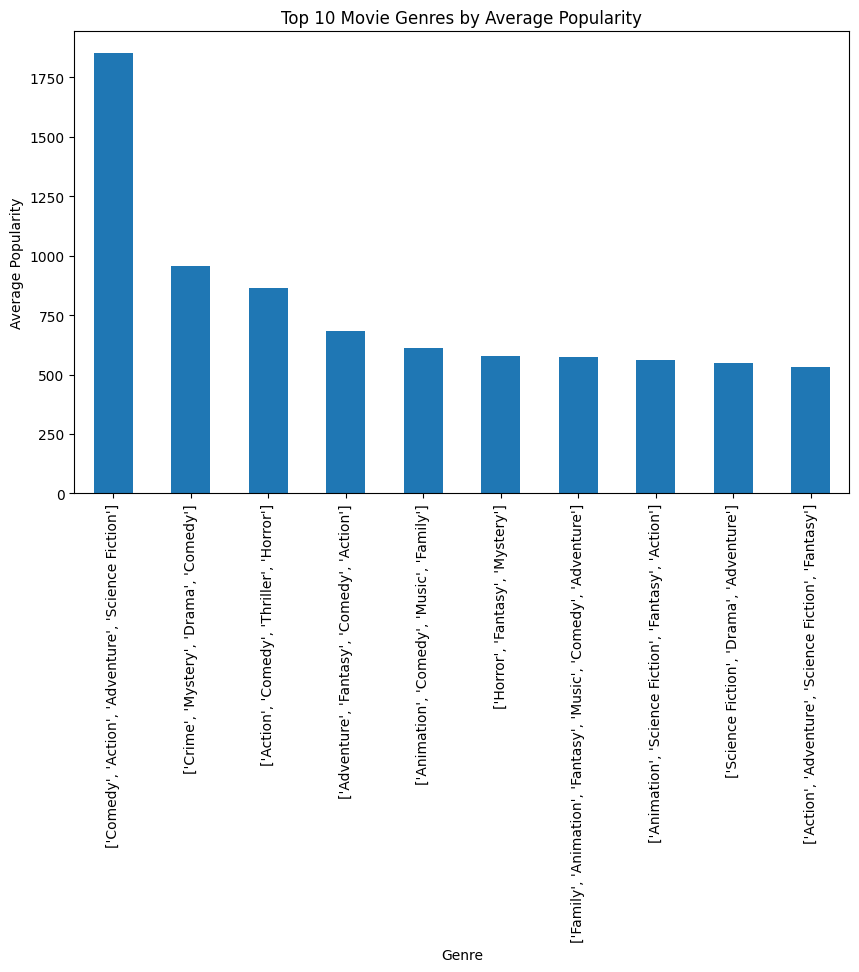

In [ ]:
# prompt: *In response to what type of the movies are more popular

# Group by genre and calculate the average popularity
genre_popularity1 = df.groupby('genre')['popularity'].mean().sort_values(ascending=False)

# Display the top 10 genres by average popularity
print(genre_popularity1.head(10))

# Visualization
import matplotlib.pyplot as plt
genre_popularity1.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Movie Genres by Average Popularity')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.show()


In [ ]:
# Print the entire genre column
print(df['genre'])

0               ['Science Fiction', 'Action', 'Adventure']
1        ['Action', 'Adventure', 'Science Fiction', 'Fa...
2               ['Action', 'Adventure', 'Science Fiction']
3                          ['Action', 'Crime', 'Thriller']
4        ['Comedy', 'Action', 'Adventure', 'Science Fic...
                               ...                        
10009    ['Adventure', 'Animation', 'Comedy', 'Science ...
10010                        ['History', 'Drama', 'Music']
10011               ['Drama', 'Action', 'Thriller', 'War']
10012                        ['Drama', 'Music', 'Romance']
10013                     ['Drama', 'Mystery', 'Thriller']
Name: genre, Length: 9962, dtype: object


In [ ]:
import ast

# Step 1: Create an empty set to hold unique genres
unique_genres = set()

# Step 2: Iterate through each genre list, converting from string to list
for genres in df['genre']:
    if isinstance(genres, str):
        genres_list = ast.literal_eval(genres)  # Convert string to list
        unique_genres.update(genres_list)  # Update the set with new genres

# Print the unique genres
print(unique_genres)

{'Horror', 'Thriller', 'Animation', 'History', 'Documentary', 'Romance', 'TV Movie', 'Family', 'Crime', 'Action', 'Fantasy', 'Drama', 'Western', 'Mystery', 'Science Fiction', 'Music', 'War', 'Adventure', 'Comedy'}


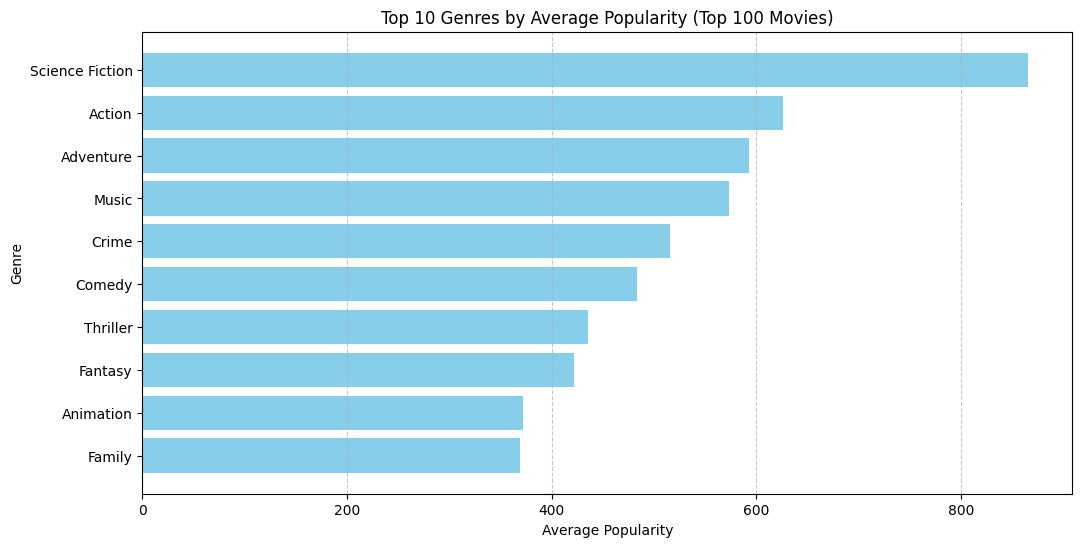

In [ ]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

# Assuming df is your cleaned DataFrame and unique_genres has been created

# Step 1: Filter top 100 movies by popularity
top_100_movies = df.nlargest(100, 'popularity')

# Step 2: Create a dictionary to hold average popularity for each genre
avg_popularity = {}

# Step 3: Calculate average popularity for each genre
for genre in unique_genres:
    # Filter movies that contain the genre
    genre_movies = top_100_movies[top_100_movies['genre'].apply(lambda x: genre in ast.literal_eval(x))]
    avg_popularity[genre] = genre_movies['popularity'].mean()

# Step 4: Convert the dictionary to a DataFrame for plotting
avg_popularity_df = pd.DataFrame(avg_popularity.items(), columns=['Genre', 'Average Popularity'])

# Step 5: Get the top 10 genres by average popularity
top_10_genres = avg_popularity_df.nlargest(10, 'Average Popularity')

# Step 6: Sort the top 10 genres in ascending order of average popularity
top_10_genres = top_10_genres.sort_values(by='Average Popularity', ascending=True)

# Step 7: Plot the top 10 genres
plt.figure(figsize=(12, 6))
plt.barh(top_10_genres['Genre'], top_10_genres['Average Popularity'], color='skyblue')
plt.title('Top 10 Genres by Average Popularity (Top 100 Movies)')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')

# Add vertical grid lines
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

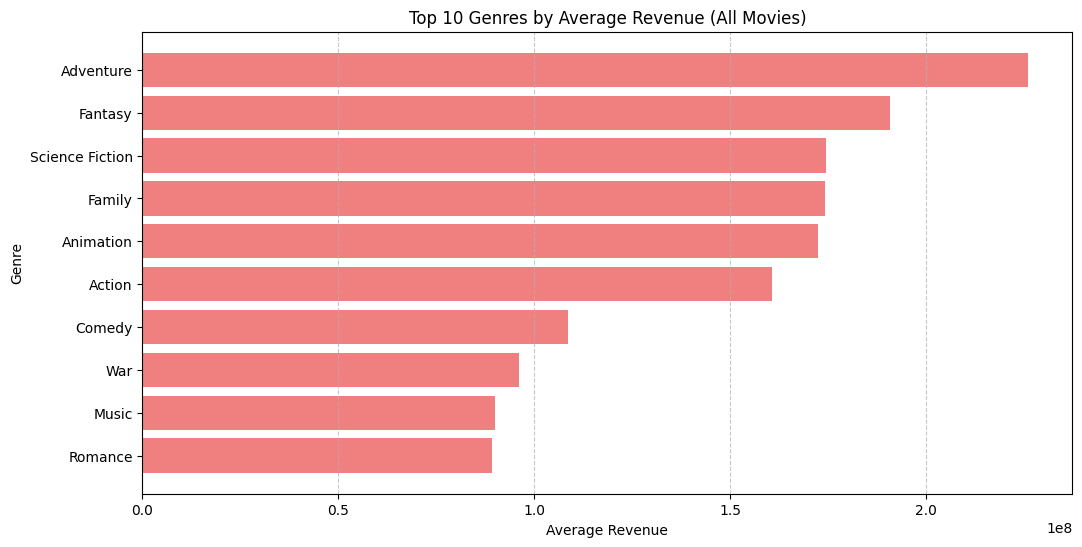

In [ ]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

# Step 1: Create a dictionary to hold average revenue for each genre
avg_revenue = {}

# Step 2: Calculate average revenue for each genre across all movies
for genre in unique_genres:
    # Filter movies that contain the genre
    genre_movies = df[df['genre'].apply(lambda x: genre in ast.literal_eval(x))]
    avg_revenue[genre] = genre_movies['revenue'].mean()

# Step 3: Convert the dictionary to a DataFrame for plotting
avg_revenue_df = pd.DataFrame(avg_revenue.items(), columns=['Genre', 'Average Revenue'])

# Step 4: Get the top 10 genres by average revenue
top_10_revenue_genres = avg_revenue_df.nlargest(10, 'Average Revenue')

# Step 5: Sort the top 10 genres in ascending order of average revenue
top_10_revenue_genres = top_10_revenue_genres.sort_values(by='Average Revenue', ascending=True)

# Step 6: Plot the top 10 genres
plt.figure(figsize=(12, 6))
plt.barh(top_10_revenue_genres['Genre'], top_10_revenue_genres['Average Revenue'], color='lightcoral')
plt.title('Top 10 Genres by Average Revenue (All Movies)')
plt.xlabel('Average Revenue')
plt.ylabel('Genre')

# Add vertical grid lines
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

<ipython-input-24-7d34c1f40b51>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')


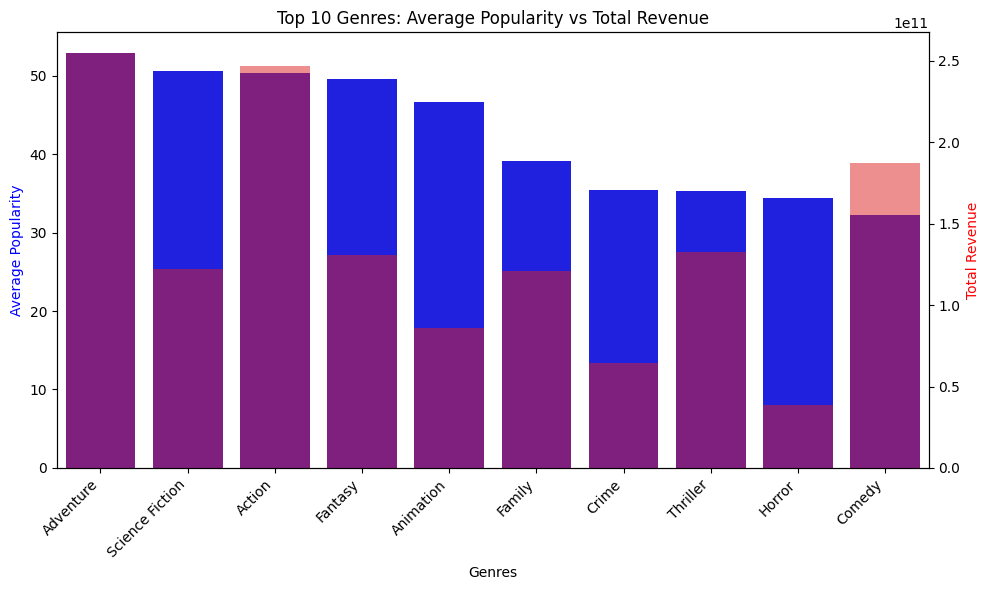

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Step 1: Initialize an empty list to store genre popularity and revenue info
genre_popularity_revenue = []

# Step 2: Loop through each genre in unique_genres and calculate average popularity and total revenue
for genre in unique_genres:
    # Filter movies that contain the current genre
    genre_movies = df[df['genre'].apply(lambda x: genre in ast.literal_eval(x) if isinstance(x, str) else [])]

    # Calculate the average popularity and total revenue for this genre
    avg_popularity = genre_movies['popularity'].mean()
    total_revenue = genre_movies['revenue'].sum()

    # Append this data to the list
    genre_popularity_revenue.append([genre, avg_popularity, total_revenue])

# Step 3: Convert the list to a DataFrame
genre_df = pd.DataFrame(genre_popularity_revenue, columns=['Genre', 'Avg_Popularity', 'Total_Revenue'])

# Step 4: Sort the DataFrame by average popularity to get top 10 genres
top_10_genres = genre_df.sort_values(by='Avg_Popularity', ascending=False).head(10)

# Step 5: Plotting the graph with popularity and revenue
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot average popularity
ax1 = sns.barplot(x='Genre', y='Avg_Popularity', data=top_10_genres, color='b')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.set_ylabel('Average Popularity', color='b')
ax1.set_xlabel('Genres')

# Create a second y-axis for the revenue
ax2 = ax1.twinx()
ax2 = sns.barplot(x='Genre', y='Total_Revenue', data=top_10_genres, color='r', alpha=0.5)
ax2.set_ylabel('Total Revenue', color='r')

# Step 6: Show the plot
plt.title('Top 10 Genres: Average Popularity vs Total Revenue')
plt.tight_layout()
plt.show()


**Popularity of movies over the years**

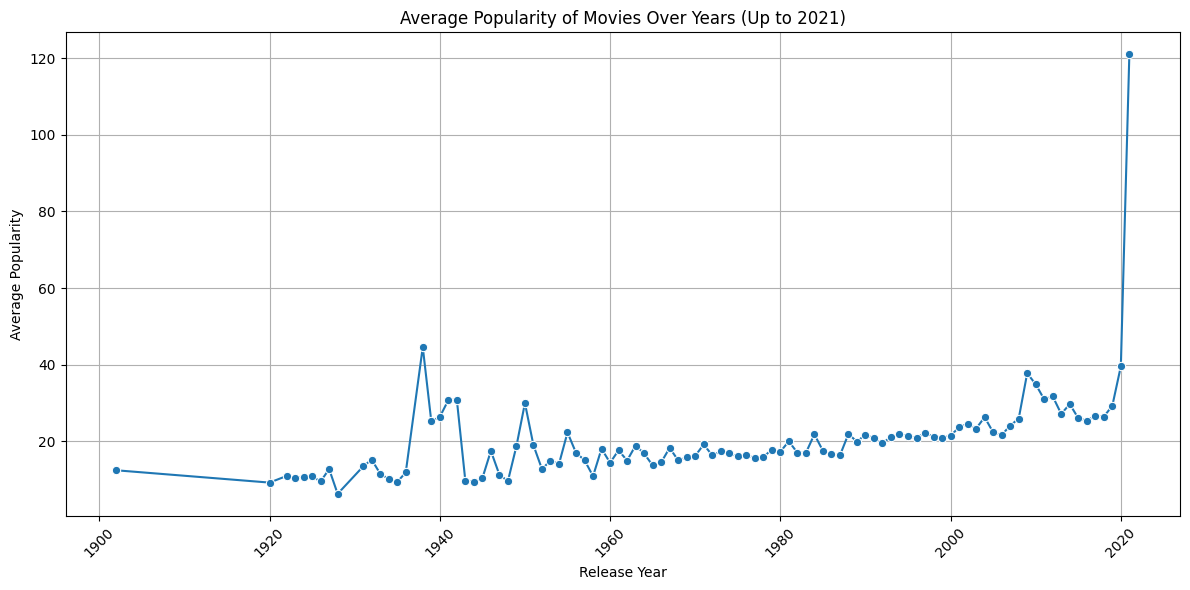

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Convert release_date to datetime and extract year
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year

# Step 2: Calculate average popularity per year
year_popularity = df.groupby('release_year')['popularity'].mean().reset_index()

# Step 3: Filter out years after 2021
year_popularity = year_popularity[year_popularity['release_year'] <= 2021]

# Step 4: Plot the popularity over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='popularity', data=year_popularity, marker='o')
plt.title('Average Popularity of Movies Over Years (Up to 2021)')
plt.ylabel('Average Popularity')
plt.xlabel('Release Year')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

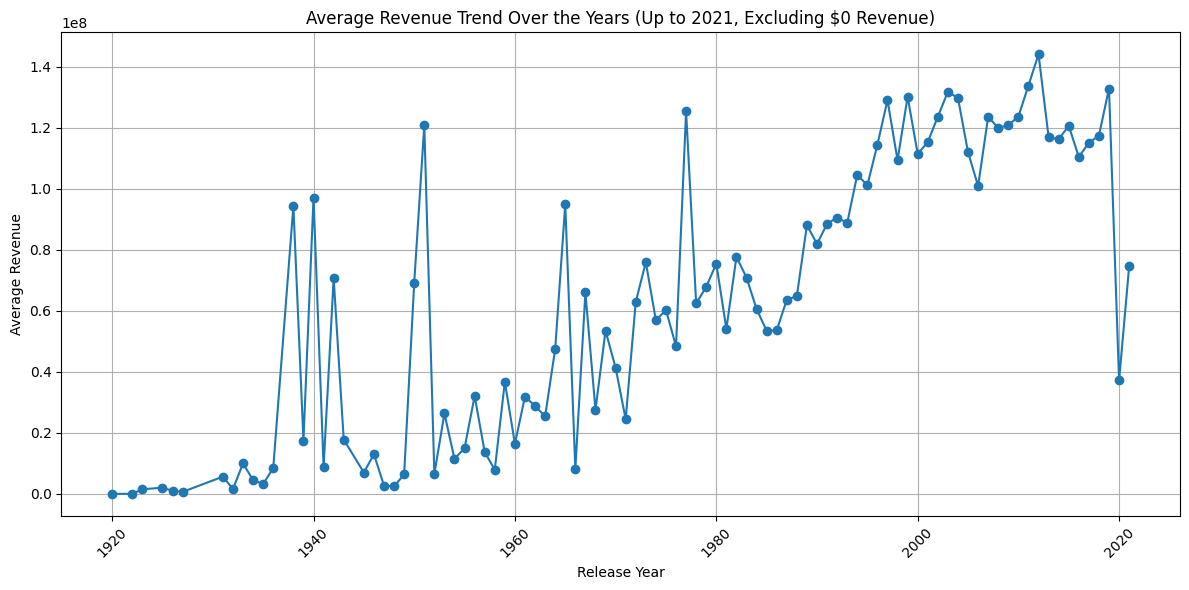

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Convert 'release_date' to datetime and extract the year
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

# Step 2: Filter out movies with 0 revenue
df = df[df['revenue'] > 0]

# Step 3: Calculate the average revenue per year
average_revenue_per_year = df.groupby('release_year')['revenue'].mean().reset_index()

# Step 4: Filter out years after 2021
average_revenue_per_year = average_revenue_per_year[average_revenue_per_year['release_year'] <= 2021]

# Step 5: Plot the average revenue trend over the years
plt.figure(figsize=(12, 6))
plt.plot(average_revenue_per_year['release_year'], average_revenue_per_year['revenue'], marker='o')
plt.title('Average Revenue Trend Over the Years (Up to 2021, Excluding $0 Revenue)')
plt.xlabel('Release Year')
plt.ylabel('Average Revenue')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Step 1: Filter the DataFrame for movies released after 2020
movies_after_2020 = df[df['release_year'] > 2020]

# Step 2: Display the filtered DataFrame
# You can choose to display specific columns, e.g., original title, release year, popularity, revenue
columns_to_display = ['original_title', 'release_year', 'popularity', 'revenue']
filtered_movies = movies_after_2020[columns_to_display]

# Step 3: Show the first few entries of the filtered DataFrame
print(filtered_movies.head())

                original_title  release_year  popularity      revenue
0  Venom: Let There Be Carnage          2021    5401.308  424000000.0
1                     Eternals          2021    3365.535  165000000.0
2                         Dune          2021    2911.423  331116356.0
3              Army of Thieves          2021    2552.437          0.0
4                     Free Guy          2021    1850.470  331096766.0


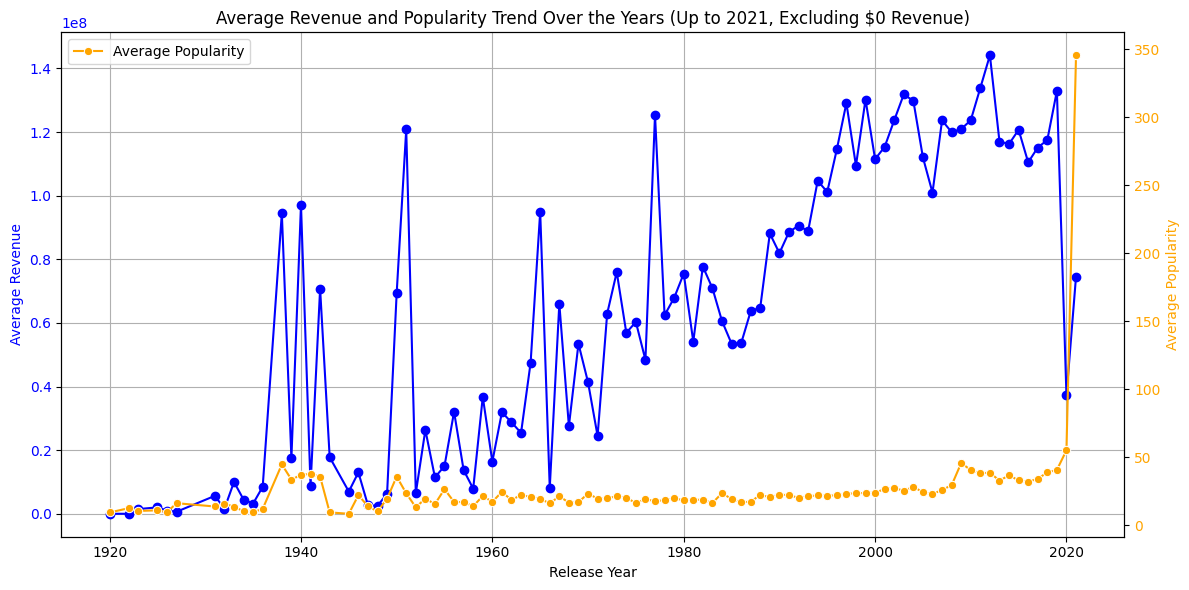

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Convert 'release_date' to datetime and extract the year
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

# Step 2: Filter out movies with 0 revenue
df = df[df['revenue'] > 0]

# Step 3: Calculate the average revenue per year
average_revenue_per_year = df.groupby('release_year')['revenue'].mean().reset_index()

# Step 4: Calculate average popularity per year
year_popularity = df.groupby('release_year')['popularity'].mean().reset_index()

# Step 5: Filter out years after 2021
average_revenue_per_year = average_revenue_per_year[average_revenue_per_year['release_year'] <= 2021]
year_popularity = year_popularity[year_popularity['release_year'] <= 2021]

# Step 6: Create the plot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average revenue on the left y-axis
ax1.plot(average_revenue_per_year['release_year'], average_revenue_per_year['revenue'],
         marker='o', color='blue', label='Average Revenue')
ax1.set_ylabel('Average Revenue', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Release Year')
ax1.set_title('Average Revenue and Popularity Trend Over the Years (Up to 2021, Excluding $0 Revenue)')

# Create a second y-axis for average popularity
ax2 = ax1.twinx()
sns.lineplot(x='release_year', y='popularity', data=year_popularity, ax=ax2, color='orange', marker='o', label='Average Popularity')
ax2.set_ylabel('Average Popularity', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add grid and finalize the plot
ax1.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-48-5be7ce7b4255>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Frequency', data=genre_freq_df, palette='viridis')


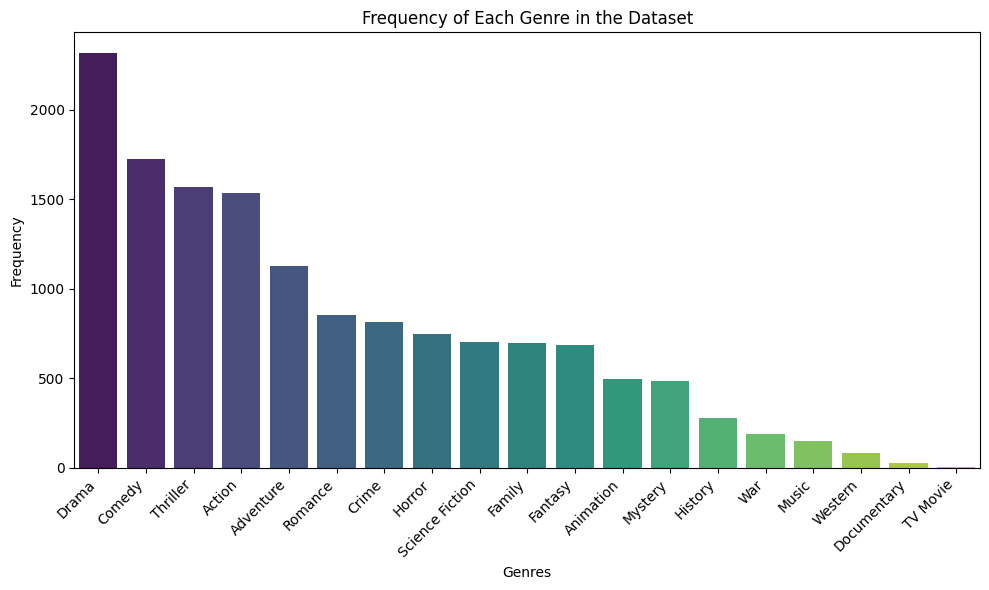

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Step 1: Initialize an empty dictionary to store genre frequencies
genre_frequency = {genre: 0 for genre in unique_genres}

# Step 2: Loop through the genre column and count the frequency of each genre
for genres in df['genre']:
    if isinstance(genres, str):
        genres_list = ast.literal_eval(genres)  # Convert the string to a list
        for genre in genres_list:
            genre_frequency[genre] += 1  # Increment the count for each genre

# Step 3: Convert the dictionary to a DataFrame for easy plotting
genre_freq_df = pd.DataFrame(list(genre_frequency.items()), columns=['Genre', 'Frequency'])

# Step 4: Sort the DataFrame by frequency
genre_freq_df = genre_freq_df.sort_values(by='Frequency', ascending=False)

# Step 5: Plotting the frequency of each genre in a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Genre', y='Frequency', data=genre_freq_df, palette='viridis')
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Frequency of Each Genre in the Dataset')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.tight_layout()

# Show the plot
plt.show()
